<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Everything I Learnt in a Kaggle Competition 🧠💡 TPS_October_21
</div>

<img src="https://i1.wp.com/awajis.com/wp-content/uploads/2017/12/comp.png?resize=768%2C337&ssl=1" style="display: block; margin-left: auto; margin-right: auto; width: 50%;"></img>

 <p style="text-align:center; font-size:150%"><i><strong> "Life is a race … If you don’t run fast… you will be like a broken andaa(egg in Hindi)…" </i>– Aamir Khan (3 Idiots) </strong></p>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Purpose of this Notebook </h1>
</div>

<p style="font-size:120%"> A little context before we begin. I am a beginner who recently started picking up Machine Learning solely due to personal interest.(C'mon, who's gonna disagree to the fact that ML is fun!😜) This time, I decided to enroll into a competition to see how well my ML skills are compared to others on this platform. Little did I know, I was way behind.</p>

<p style="font-size:120%"> Kaggle Competitions are a great way to improve your skill and increase your knowledge through a lot of collaborations, learnings and discussions. We are blessed, Kaggle allows us to do just that. Thank you Kaggle 🥳</p>
    
<p style="font-size:120%"> Therefore, the sole purpose of this notebook is to help beginners or participants in any competition understand, which factors are important and what one should keep in mind while competing in a Kaggle Competition based off my experience. In-case you disagree to some points, or even have more points to add to this, please feel free to add them in the comments. Let's all grow together by teaching each other.🎓</p>

<p style="font-size:120%"> All the Credits goes to all the individuals that came up with several brilliant ideas and discussions during <strong>TPS_Oct_21</strong>. You guys are amazing!</p>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Understanding the Competition and the Data </h1>
</div>

# The Competition:

<p style="font-size:120%"> The dataset used for this competition is synthetic, but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the biological response of molecules given various chemical properties. Although the features are anonymized, they have properties relating to real-world features.</p>

<p style="font-size:120%"> To put in simple words, it is a binary classification problem statement.</p>

# Evaluation Metric:

<p style="font-size:120%"> The model performance will be evaluated based on the values predicted by our model on the Test dataset on the basis of <strong>Area Under the Curve</strong>, or <strong>roc_auc_score.</strong></p>

### Here are some Resources that I found in the Discussion:
<ul>
    <li style="font-size:120%" >Understanding the Evaluation metric: AUC ( Area Under Curve) by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275733" style="text-decoration:none">Kriti Doneria</a></li>
    <li style="font-size:120%" >Understand Evaluation metric For this Competition - ROC Curve? by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275641" style="text-decoration:none">Shravan Kumar Koninti.</a></li>
</ul>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Let's have a look at the data! </h1>
</div>

In [ ]:
# Importing all the dependencies (Hidden Input)
import gc  # For Garbage collection. Helps free up memory (RAM)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score  # For evaluation
from sklearn.linear_model import LogisticRegression

In [ ]:
# Helper function to reduce memory usage
# credits -- https://www.kaggle.com/gemartin/load-data-reduce-memory-usage

def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file)
    df = reduce_mem_usage(df)
    return df

<p style="font-size:120%"> The above helper function, assists us in reducing the memory that is consumed by modifying the data types in each of the columns. As, you can see below, it reduces memory usage by 76.9%</p>

In [ ]:
# Reading the train and test data using Pandas

train = import_data('../input/tabular-playground-series-oct-2021/train.csv')
test = import_data('../input/tabular-playground-series-oct-2021/test.csv')

print("No. of rows and columns in Train Data: ", train.shape)
print("No. of rows and columns in Test Data: ", test.shape)

<p style="font-size:120%"> Now that took a <strong>PRETTY LONG TIME!</strong></p>

<p style="font-size:120%"> It is evident by the fact that there are <strong>1MILLION rows!</strong> in the Train data and 500k in the Test.</p>

### The Solution?

<p style="font-size:120%"> There are better and FASTER ways to work with a dataframe that has many records.</strong></p>

### Here are some Resources that I found in the Discussion:
<ul>
    <li style="font-size:120%" >1M rows: ...how to read in only some of the data by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275669" style="text-decoration:none">Carl McBride Ellis.</a></li>
    <li style="font-size:120%" >🔥🔥Tutorial compilation for handling larger datasets by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275712" style="text-decoration:none">Tensor Girl.</a></li>
    <li style="font-size:120%" >Datatable loads data 6.6x faster than pandas! by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/276162" style="text-decoration:none">L0Z1K.</a></li>
    <li style="font-size:120%" >How to speed up Pandas (Article) by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275670" style="text-decoration:none">Maximiliano Diaz Battan.</a></li>
</ul>

<p style="font-size:120%"> For now, I'm going to go ahead with good 'ol Pandas.</strong></p>

In [ ]:
gc.collect() # Garbage Collection

<p style="font-size:120%"> For those of you wondering why we have used <strong>gc.collect() (Garbage Collection)</strong>, it has been used to clean up a huge amount of objects that would have been created. This is done to free up memory. Read more about it <a href="https://stackify.com/python-garbage-collection/" style="text-decoration:none">here.</a></p>

<p style="font-size:120%"> If we do not do that however, It might crash the notebook.</p>

### Here are some Resources that I found in the Discussion:
<ul>
    <li style="font-size:120%" >Getting memory exceeded | reduce memory by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275663" style="text-decoration:none">shuvo.</a></li>
    <li style="font-size:120%" >Save memory for running your best models by <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/275854" style="text-decoration:none">Luca Massaron.</a></li>
</ul>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Brief Exploratory Data Analysis </h1>
</div>

<p style="font-size:120%"> Before we move further, let's have a quick look at our data.</p>

In [ ]:
# Here, we create y panda-series with only the target column. 

y = train['target']

# Next we will drop the 'id' and 'target' from the train and test

train.drop(columns = ['id', 'target'], inplace = True)
test.drop(columns = 'id', inplace = True)

In [ ]:
# Now we will combine the train and test into a master dataframe to perform an EDA

df_main = pd.concat([train,test], axis=0)
print("Number of rows and columns in the Master dataframe: ", df_main.shape)

In [ ]:
del train, test

gc.collect()

In [ ]:
# Checking the descriptive Statistics of the master dataframe (Hidden Input)

df_main.loc[:,:'f241'].describe(percentiles=[0.01,0.1,0.98,0.99]).T.style.bar(
    subset=['mean'],
    color='lightsalmon').background_gradient(
    subset=['std'], cmap='plasma').background_gradient(subset=['99%','98%'], cmap='plasma').background_gradient(
    subset=['max'], cmap='plasma')

In [ ]:
gc.collect()

<p style="font-size:120%"> By looking at the above Descriptive Statistics of the Master Dataframe, we can see that, the Standard Deviation of the features: <strong>f44, f138, f139, f144 , f146, f157, f158 and f160</strong> are abnormally high! </p>

<p style="font-size:120%"> To better understand this, let's look at some kdeplot.</p>

# Strange features with High Std. Deviations:

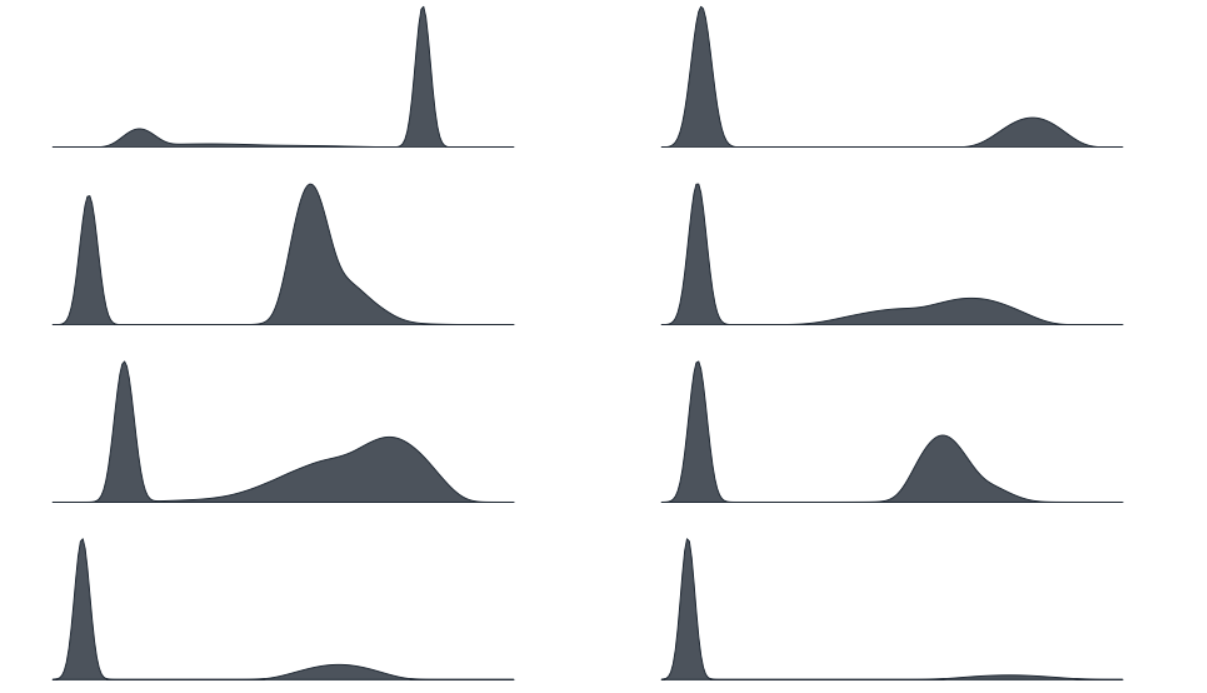

In [ ]:
gc.collect()

<p style="font-size:120%"> You can find more on the above analysis here in my <a href="https://www.kaggle.com/c/tabular-playground-series-oct-2021/discussion/276416" style="text-decoration:none">discussion.</a></p>

In [ ]:
# With the above features, we can convert them into binary features

# For example: if we take the mean of the values in the columns, we can split the data into binary with values above mean as 1 and others 0.

lis_cols = ['f44', 'f138', 'f139', 'f144', 'f146', 'f157', 'f158', 'f160']

for col in lis_cols:
    mean = df_main[col].mean()
    df_main[col] = df_main[col].apply(lambda x: 1 if x > mean else 0)
    gc.collect()

In [ ]:
# Creating a heatmap of the numerical column (Hidden Input)

heat = df_main.corr()
plt.figure(figsize=[16,8])
plt.title("Correlation between all the Features", size=25, pad=20, color='#1f2833')
sns.heatmap(heat, cmap=['#0b0c10', '#1f2833','#c5c6c7','#45a29e','#66fcf1'], annot=False)
plt.show()

In [ ]:
gc.collect()

<div class="alert alert-success">

<p style="font-size:120%;color:black"> ⭐ For more on EDA, I would suggest you look into <a href="https://www.kaggle.com/legendsoul/tps-october-21-comprehensive-insight-of-eda" style="text-decoration:none">this notebook</a> by EMIN KAZDALOĞLU </p>
    
</div>

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       Model Building </h1>
</div>

### Different Approaches:

<p style="font-size:120%"> Now, deciding which model to build is the most common question that you might ask. The answer to this can be found using various AutoML libraries. One such great Library known as FLAML is a great choice, since it also performs Hyperparameter tuning for you. Read more about them <a href="https://www.kaggle.com/general/275778#1530938" style="text-decoration:none">here</a>.</p>

<p style="font-size:120%"> Once you have your model decided, you can use a single model to build! And further, you can perform more hyperparameter tuning on it using Optuna. In this competition, single models have shown great performances! Check out one such model <a href="https://www.kaggle.com/mohammadkashifunique/tsp-single-xgboost-model" style="text-decoration:none">here</a>.</p>

<p style="font-size:120%"> Another very important thing to keep in mind while competing is, Esemble models sometimes give you an edge over single models. Techniques like Stacking and Blending have proven to improve score. Therefore, Stacking is the approach that I learnt personally from Jun Hyeok Park's <a href="https://www.kaggle.com/junhyeok99/stacking-ensemble-tutorial" style="text-decoration:none">notebook</a>.</p>

<p style="font-size:120%"> For the approach below, I am not running the code, since it will take forever. You are free to experiment with it. </p>

In [ ]:
# Splitting the data into train and test again and merging the target for train

train = df_main.iloc[:1000000,:]
test = df_main.iloc[1000000:,:]

print(train.shape)
print(test.shape)

In [ ]:
del df_main

gc.collect()

In [ ]:
# Creation of the Dataframe

def Stacking_Data_Loader(model, model_name, train, y, test, fold):
    '''
    Put your train, test datasets and fold value!
    This function returns train, test datasets for stacking ensemble :)
    '''

    stk = StratifiedKFold(n_splits = fold, random_state = 42, shuffle = True)
    
    # Declaration Pred Datasets
    train_fold_pred = np.zeros((train.shape[0], 1))
    test_pred = np.zeros((test.shape[0], fold))
    
    for counter, (train_index, valid_index) in enumerate(stk.split(train, y)):
        x_train, y_train = train.iloc[train_index], y[train_index]
        x_valid, y_valid = train.iloc[valid_index], y[valid_index]

        print('------------ Fold', counter+1, 'Start! ------------')
        if model_name == 'cat':
            model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)])
        elif model_name == 'xgb':
            model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric = 'auc', verbose = 500, early_stopping_rounds = 200)
        else:
            model.fit(x_train, y_train, eval_set=[(x_valid, y_valid)], eval_metric = 'auc', verbose = 500, early_stopping_rounds = 200)
            
        print('------------ Fold', counter+1, 'Done! ------------')
        
        train_fold_pred[valid_index, :] = model.predict_proba(x_valid)[:, 1].reshape(-1, 1)
        test_pred[:, counter] = model.predict_proba(test)[:, 1]
        
        del x_train, y_train, x_valid, y_valid
        gc.collect()
        
    test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1, 1)
    
    del test_pred
    gc.collect()
    
    print('Done!')
    
    return train_fold_pred, test_pred_mean

In [ ]:
# All the necessary parameters

lgb_params = {
    'objective': 'binary',
    'n_estimators': 23000,
    'random_state': 42,
    'learning_rate': 0.004,
    'subsample': 0.8,
    'subsample_freq': 7,
    'colsample_bytree': 0.4,
    'reg_alpha': 10.0,
    'reg_lambda': 0.5,
    'min_child_weight': 256,
    'min_child_samples': 15,
    'metric': 'auc',
    'device': 'gpu',
    'gpu_platform_id': 0,
    'gpu_device_id' : 0,
    'n_jobs': -1
}


xgb_params = {'n_estimators': 7000,
               'learning_rate': 0.05,
               'max_depth': 6,
               'colsample_bytree': 0.2,
               'subsample': 0.7,
               'eval_metric': 'auc',
               'use_label_encoder': False,
               'gamma': 0,
               'reg_lambda': 60.0,
               'tree_method': 'gpu_hist',
               'gpu_id': 0,
               'predictor': 'gpu_predictor',
               'n_jobs': -1,
               'random_state': 42}

cat_params = {'iterations': 15000,
               'learning_rate': 0.01,
               'reg_lambda': 0.4,
               'subsample': 0.9,
               'random_strength': 25,
               'depth': 8,
               'min_data_in_leaf': 6,
               'leaf_estimation_iterations': 6,
               'task_type':"GPU",
               'bootstrap_type':'Poisson',
               'verbose' : 500,
               'early_stopping_rounds' : 200,
               'eval_metric' : 'AUC',
               'thread_count': -1}

In [ ]:
gc.collect()

In [ ]:
# Creating intance of the object

lgbm = LGBMClassifier(**lgb_params)

xgb = xgb.XGBClassifier(**xgb_params)

cat = CatBoostClassifier(**cat_params)

In [ ]:
# Stacking all the models

cat_train, cat_test = Stacking_Data_Loader(cat, 'cat', train, y, test, 5)
del cat
gc.collect()

lgbm_train, lgbm_test = Stacking_Data_Loader(lgbm, 'lgbm', train, y, test, 5)
del lgbm
gc.collect()

xgb_train, xgb_test = Stacking_Data_Loader(xgb, 'xgb', train, y, test, 5)
del xgb
gc.collect()

In [ ]:
# Getting the X_train and X_test

stack_x_train = np.concatenate((cat_train, lgbm_train, xgb_train), axis = 1)
stack_x_test = np.concatenate((cat_test, lgbm_test, xgb_test), axis = 1)

del cat_train, lgbm_train, xgb_train, cat_test, lgbm_test, xgb_test
gc.collect()

stack_x_train

In [ ]:
# Stacking

stk = StratifiedKFold(n_splits = 5)

test_pred_lo = 0
fold = 1
total_auc = 0

for train_index, valid_index in stk.split(stack_x_train, y):
    x_train, y_train = stack_x_train[train_index], y[train_index]
    x_valid, y_valid = stack_x_train[valid_index], y[valid_index]
    
    lr = LogisticRegression(n_jobs = -1, random_state = 1, C = 10, max_iter = 17000)
    lr.fit(x_train, y_train)
    
    valid_pred_lo = lr.predict_proba(x_valid)[:, 1]
    test_pred_lo += lr.predict_proba(stack_x_test)[:, 1]
    auc = roc_auc_score(y_valid, valid_pred_lo)
    total_auc += auc / 5
    print('Fold', fold, 'AUC :', auc)
    fold += 1
    
print('Total AUC score :', total_auc)

In [ ]:
gc.collect()

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       My Submission </h1>
</div>

In [ ]:
# Submitting into the csv file

sub = pd.read_csv('../input/tabular-playground-series-oct-2021/sample_submission.csv')
sub['target'] = valid_pred_lo
sub.to_csv('my_stack_sub.csv', index = 0)
sub

<div class="alert alert-block alert-info" >
    <h1 style="text-align:center;font-weight: 20px; color:black;">
       My Leaderboard Score </h1>
</div>

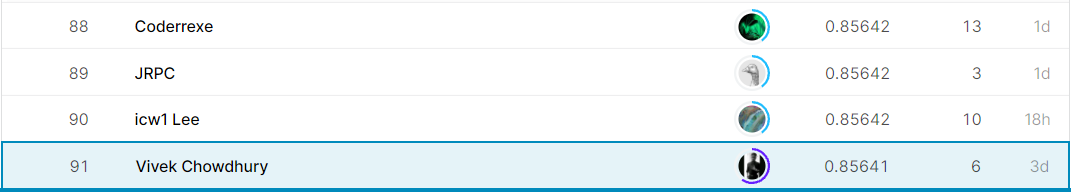

<p style="font-size:120%"> Finally, to sum up, there were a lot of things to learn in this competition. Met many people, had great discussions on many ideas with them.</p>

<p style="font-size:120%"> One of the Kaggler had very well summed up her experience in Kaggle competitions. You can read about it <a href="https://www.kaggle.com/getting-started/275912" style="">here</a>.</p>

<div class="alert alert-success">
    <h3 style="text-align:center"> If you liked/forked this notebook, consider giving it an upvote. Also, go check out other Kagglers' mentioned throughout this notebook. They are all gems! and there are many things to learn from each one of them. </h3>
    <h1 style="text-align:center">All the Best!</h1>
</div>